* datetime : hourly date + timestamp

* season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울

* holiday : 1 = 토,일요일의 주말을 제외한 국경일과 같은 휴일, 0 = 휴일이 아닌 날

* workingday: 1 = 토,일요일의 주말과 휴일을 제외, 0 = 주말 및 휴일

* weather:


    + 1 = 맑음, 약간 구름 낀 흐림    
    + 2 = 안개, 안개 + 흐림    
    + 3 = 가벼운 눈, 가벼운 비 + 천둥    
    + 4 = 심한 눈, 심한 비+ 천둥
    
   
* temp = 온도(섭씨)

* atemp = 체감온도(섭씨)

* humidity = 습도

* windspeed = 풍속  

* casual = 사전 미등록자가 대여한 횟수

* registered = 사전 등록자가 대여한 횟수

* count = 대여횟수

In [28]:
## 기본라이브러리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# 회귀평가지표 - 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [30]:
# 알고리즘 - 회귀계열
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [31]:
# 알고리즘-tree 계열 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [33]:
bike_df = pd.read_csv('./bike-sharing-demand/train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [34]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [35]:
# 위에서 존재하는 object를 datetime으로 변환 필요
# datetime을 쪼개어 시간 데이터로 정리
# year, month, day, time

bike_df['datetime'] = pd.to_datetime(bike_df['datetime']) # bike_df['datetime'].apply(pd.to_datetime)

In [36]:
bike_df['year'] = bike_df['datetime'].apply(lambda x: x.year)
bike_df['mbonth'] = bike_df['datetime'].apply(lambda x: x.month)
bike_df['day'] = bike_df['datetime'].apply(lambda x: x.day)
bike_df['hour'] = bike_df['datetime'].apply(lambda x: x.hour)

In [37]:
## 데이터 전처리가 어느정도 완료

bike_df_new = bike_df.drop(['datetime','casual','registered'],axis=1)
bike_df_new

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,mbonth,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


<AxesSubplot:>

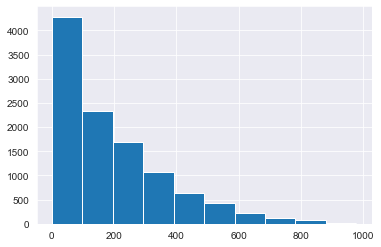

In [40]:
bike_df_new['count'].hist()

In [41]:
# 회귀평가지표 :: RMSLE, RMSE
# 위에서 y데이터를 histogram으로 확인해 보니
# 오른쪽 꼬리가 긴 형태를 지닌다.

## 따라서 이를 조금 더 scaling 해주고자 log를 취하고 1을 더해줄 것이다.
# 위의 식은 np.log1p()함수를 사용하면 쉽게 구현이 가능하다... 

def rmsle(y_test,pred):
    log_y = np.log1p(y_test) # actual_y :: log1p를 해주는 이유_
                             # infinity 문제를 해결하기 위해...
    
    log_pred = np.log1p(pred) # y_pred
    squared_log_error1 = (log_y- log_pred)**2 # 실제값과 예측값의 차이는 y개수만큼
    mean_squared_log_error1 = np.mean(squared_log_error1)
    rmsle_result = np.sqrt(mean_squared_log_error1)
    
    return rmsle_result
    

In [42]:
### RMSE 평가지표 함수화
def rmse(y_test, pred):
    rmse_result = np.sqrt(mean_squared_error(y_test,pred))
    return rmse_result

In [43]:
# RMSLE와 RMSE의 지표를 합쳐서 함수화해보자.
def get_eval_index(y_test,pred):
    rmsle_eval = rmsle(y_test,pred)
    rmse_eval = rmse(y_test,pred)
    # mean_absolute_error도 포함 _우리가 보기 쉽게
    mae_eval = mean_absolute_error(y_test,pred)
    print('RMSLE:{0:.4f}, RMSE:{1:.4f}, MAE:{2:.4f}'.format(rmsle_eval,rmse_eval,
                                                           mae_eval))

In [44]:
# data_split by using train_test_split
# y값을 설정
from sklearn.model_selection import train_test_split


y_target = bike_df_new['count']
X_ftrs = bike_df_new.drop(['count'], axis=1)

## 데이터 분할 :: train_test_split

xtrain, xval, ytrain, yval = train_test_split(X_ftrs, y_target,
                                             test_size=0.3,
                                             random_state=0)
# 단순선형회귀분석

lr_reg = LinearRegression()
lr_reg.fit(xtrain,ytrain)
pred_lr_reg = lr_reg.predict(xval)

get_eval_index(yval, pred_lr_reg)

RMSLE:1.1647, RMSE:140.8996, MAE:105.9244


C:\Users\user\AppData\Local\Temp/ipykernel_7364/3617992742.py:12: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred) # y_pred


In [45]:
### 지표를 체감하기 위해
## check_df라는 것을 만들어본다.

check_df = pd.DataFrame(yval.values, columns=['actual_y'])
check_df['pred_y'] = pred_lr_reg
check_df['diff'] = np.abs(check_df['pred_y']-check_df['actual_y'])
check_df.sort_values(by='diff', ascending=False).reset_index()[:10]

,index,actual_y,pred_y,diff
0,1618,890,322.117787,567.882213
1,966,884,326.704555,557.295445
2,3151,798,241.365876,556.634124
3,412,745,193.895003,551.104997
4,2277,813,266.977808,546.022192
5,2817,856,310.080940,545.919060
6,454,721,176.740660,544.259340
7,2314,766,222.362124,543.637876
8,1003,713,170.723496,542.276504
9,2394,684,142.451960,541.548040


<AxesSubplot:>

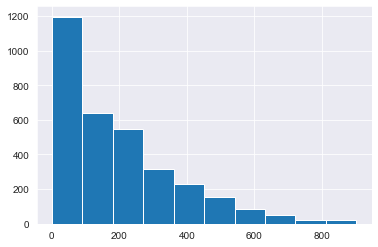

In [46]:
### yval.hist를 통해 분포를 확인
## 이 분포가 오른쪽 꼬리가 길다라는 것을 확인

yval.hist()

<AxesSubplot:>

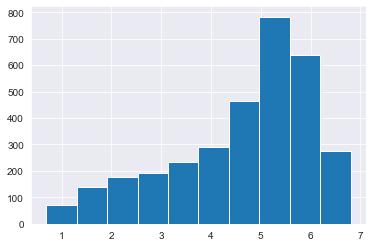

In [47]:
# log_scaling
log1p_yval = np.log1p(yval)
log1p_yval.hist()

In [48]:
### y_target을 log1p를 통해
### 전체 log_scaling을 시도

y_target_log1p = np.log1p(y_target) # log_scaling 후의 y_target

from sklearn.model_selection import train_test_split

# y_target = bike_df_new['count']
# 위의 원본 y값이 아닌 스케일링 후의 log_y를 대입

y_target_log1p = np.log1p(y_target)
X_ftrs = bike_df_new.drop(['count'], axis=1)

## 데이터 분할 :: train_test_split
xtrain, xval, ytrain_log, yval_log = train_test_split(X_ftrs, y_target_log1p,
                                             test_size=0.3,
                                             random_state=0)
# 단순선형회귀분석

lr_reg = LinearRegression()
lr_reg.fit(xtrain,ytrain_log)
pred_lr1_reg = lr_reg.predict(xval) # 로그화가 진행된 y_pred가

# 위에서 log를 통해 스케일링을 한
# yval_log를 원상복귀 시킴 
yval_exp = np.expm1(yval_log)

## 그 이후 원상태의 y_pred :: pred_lr1_reg VS yval_log를 원상복귀
pred_lr1_exp = np.expm1(pred_lr1_reg)

get_eval_index(yval_exp, pred_lr1_exp)

RMSLE:1.0168, RMSE:162.5943, MAE:109.2862


In [49]:
# RMSLE는 줄어들었으나
# RMSE는 오히려 늘어났다. 즉, 오차값이 늘었다는 것이다
# 이에 이 이유를 규명해보고자 시각화를 살펴보자

<AxesSubplot:>

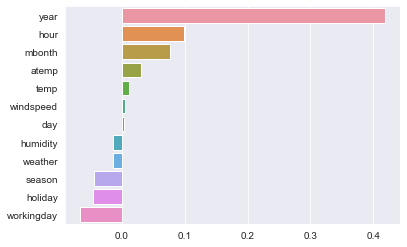

In [50]:
coef = pd.Series(lr_reg.coef_, index=X_ftrs.columns)
coef_sorted = coef.sort_values(ascending=False)
sns.barplot(x=coef_sorted.values, y=coef_sorted.index)

2012    5464
2011    5422
Name: year, dtype: int64

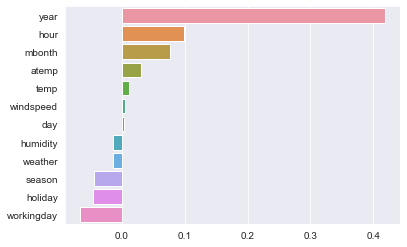

In [53]:
# year는 연도를 의미하므로... 범주형자료의 느낌
# 그런데 지금 해당데이터에는 데이터 크기에 따른 
# 가중치(weight = coef = 계수)가 크게 부여가 됨

bike_df_new['year'].value_counts()

In [52]:
X_ftrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   mbonth      10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1020.7 KB


In [ ]:
['year','month','day','hour','holiday',
'workingday','season','weather']

In [ ]:
# 위의 데이터들 중 범주형 자료의 경우
# 원핫 인코딩을 통해 feature들을 전처리 해줌

X_ftrs_oh = pd.get_dummies(X_ftrs, columns=['year','month','day','hour','holiday',
'workingday','season','weather'])

In [ ]:
## 원핫 인코딩이된 X_ftrs
X_ftrs_oh

### y_target을 log1p를 통해
### 전체 log_scaling을 시도
y_target_log1p = np.log1p(y_target) # log_scaling 후의 y_target


### 여러분들이 하실 일~!
## 알고리즘 적용 및
## 위에서 설정해둔 회귀지표로 평가까지 진행~! 


# Ridge, Lasso, LinearRegression 적용

# Tree계열 적용 - RandomForestRegressor, LGBMRegressor
#               - GradientBoostingRegressor 

In [ ]:
# end of_preprocessing

In [ ]:
### 전처리된 데이터들로 다시금 분할하여
## 새로운 모델을 학습해본다.
## 이번에는 선형모델외에 Ridge와 Lasso를 모두 적용하여
# 선형기반의 회귀분석을 진행해본다.

## 원핫 인코딩이된 X_ftrs
X_ftrs_oh

### y_target을 log1p를 통해
### 전체 log_scaling을 시도
y_target_log1p = np.log1p(y_target) # log_scaling 후의 y_target

xtrain2, xval2, ytrain2, yval2 = train_test_split(X_ftrs_oh, y_target_log1p,
                                               test_size=0.3, random_state=0)

# Ridge와 Lasso 호출
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lr_reg = LinearRegression()
ridge = Ridge(alpha= 10) # L2 제곱해서 더한다...
lasso = Lasso(alpha= 0.001) # L1 절대값으로 더한다...

models = [lr_reg, ridge, lasso]


for model in models:
    model.fit(xtrain2,ytrain2)
    pred= model.predict(xval2)
    yval_exp1 = np.expm1(yval2)
    pred_exp1 = np.expm1(pred)
    print('\n ###', model.__class__.__name__, '### \n')   
    get_eval_index(yval_exp1, pred_exp1)   

In [ ]:
# one_hot_encoding 이후를 시각화를 진행
# ridge :: L2규제
coef = pd.Series(ridge.coef_, index=X_ftrs_oh.columns)
coef_sorted_r = coef.sort_values(ascending=False)[:11]
coef_sorted_r

sns.barplot(x=coef_sorted_r.values, y= coef_sorted_r.index)

In [ ]:
# one_hot_encoding 이후를 시각화를 진행
# Lasso :: L1규제
coef_l = pd.Series(lasso.coef_, index=X_ftrs_oh.columns)
coef_sorted_l = coef.sort_values(ascending=False)[:11]
coef_sorted_l

sns.barplot(x=coef_sorted_l.values, y= coef_sorted_l.index)

In [ ]:
### RandomForestRegressor 적용
from sklearn.ensemble import RandomForestRegressor

# 모델로 평가지표 분석
rf_reg = RandomForestRegressor(n_estimators=500)

rf_reg.fit(xtrain2,ytrain2)
pred_rf = rf_reg.predict(xval2)

# y 원상복귀 
yval_expm1_rf = np.expm1(yval2)

# pred 원상복귀 
pred_expm1_rf = np.expm1(pred_rf)

get_eval_index(yval_expm1_rf,pred_expm1_rf)

In [ ]:
### LGBMRegressor를 활용하여 
### 위의 지표 확인 :: 수치를 적어본다. 
### 아마 랜포보다 더 좋은 수치를 기대.. 

In [5]:
### test 데이터를 통해 다시금 
### 위의 지표 확인

In [117]:
# end of files -- 22.06.20